# OZONE LAYER DEPLETION ANALYSIS AND PREDICTION USING FB PROPHET

# Plan of Attack
 

1. Introduction and Installation
2. Data Cleaning
3. Plotting Dataframe
3. Model Fitting
4. Making Future Predictions
5. Obtaining the Forecasts
6. Plotting the Forecasts
6. Plotting the Forecast Components
7. Cross Validation
8. Obtaining the Performance Metrics
9. Visualizing Performance Metrics


# 1. Introduction and Installation

There are very many open source forecastings tools, however none of these would be fit to solve all forecasting problems. Prophet works best with hourly, and weekly data that is several months. When working with Prophet yearly data is most prefered.

Prophet can be installed using pip in Python as shown below. Prophet depends on a Python module called pystan. This module will be installed automatically as we install Prophet.

In [ ]:
pip install fbprophet

importing Pandas, Numpy, matplotlib for data manipulation, plotings and Prophet for forecasting. 

Next we load in our dataset and check its preview from head.



In [ ]:
import pandas as pd
import numpy as np
import fbprophet
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('Ozone_data_updated2.csv',parse_dates=True,squeeze=True)

# 2. Data Cleaning

In [ ]:
df.head()

,date,h1,h2,h3,h4,h5,h6,h7,h8,h9,h10,h11,h12,h13,h14,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24,h25,h26,h27,h28,h29,h30,h31,h32,h33,h34,h35,h36,h37,h38,h39,...,h135,h136,h137,h138,h139,h140,h141,h142,h143,h144,h145,h146,h147,h148,h149,h150,h151,h152,h153,h154,h155,h156,h157,h158,h159,h160,h161,0-100du,101-150du,151-200du,201-250du,251-300du,301-350du,351-400du,401-450du,451-500du,501-550du,551-600du,601-700du,0-700du
0,1/1/1979,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12179.41,74100.00,205214.29,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,86279.41,38768687.50,21674210.00,8074111.36,917926.67,0.00,0.00,0.00,69521214.94
1,1/2/1979,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,294.12,3267.65,11100.00,159644.64,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,14661.76,38583466.07,21503240.00,8430286.36,1182080.00,0.00,0.00,0.00,69713734.20
2,1/3/1979,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2764.71,5588.24,6776.47,8558.82,10952.94,29117.65,23529.41,30002.94,74100.00,206723.21,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,191391.18,38323612.50,21306153.33,8419747.73,1620880.00,0.00,0.00,0.00,69861784.74
3,1/4/1979,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,...,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?
4,1/5/1979,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,13979.41,25364.71,18635.29,47352.94,80800.00,186000.00,515751.79,...,55733.33,53040.00,48766.67,50116.67,32240.00,10466.67,13166.67,17490.00,16533.33,5366.67,2700.00,2173.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,372132.35,37735732.14,21463181.67,8110063.64,1879853.33,352086.67,0.00,0.00,69913049.80


Now, as we see many missing values in the data in the form, of '?' we need to replace it with NAN values 

In [ ]:
df.replace({'?':np.nan}, inplace=True)

In [ ]:
df.head()

,date,h1,h2,h3,h4,h5,h6,h7,h8,h9,h10,h11,h12,h13,h14,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24,h25,h26,h27,h28,h29,h30,h31,h32,h33,h34,h35,h36,h37,h38,h39,...,h135,h136,h137,h138,h139,h140,h141,h142,h143,h144,h145,h146,h147,h148,h149,h150,h151,h152,h153,h154,h155,h156,h157,h158,h159,h160,h161,0-100du,101-150du,151-200du,201-250du,251-300du,301-350du,351-400du,401-450du,451-500du,501-550du,551-600du,601-700du,0-700du
0,1/1/1979,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12179.41,74100.00,205214.29,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,86279.41,38768687.50,21674210.00,8074111.36,917926.67,0.00,0.00,0.00,69521214.94
1,1/2/1979,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,294.12,3267.65,11100.00,159644.64,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,14661.76,38583466.07,21503240.00,8430286.36,1182080.00,0.00,0.00,0.00,69713734.20
2,1/3/1979,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2764.71,5588.24,6776.47,8558.82,10952.94,29117.65,23529.41,30002.94,74100.00,206723.21,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,191391.18,38323612.50,21306153.33,8419747.73,1620880.00,0.00,0.00,0.00,69861784.74
3,1/4/1979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1/5/1979,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,13979.41,25364.71,18635.29,47352.94,80800.00,186000.00,515751.79,...,55733.33,53040.00,48766.67,50116.67,32240.00,10466.67,13166.67,17490.00,16533.33,5366.67,2700.00,2173.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,372132.35,37735732.14,21463181.67,8110063.64,1879853.33,352086.67,0.00,0.00,69913049.80


Now replace the NAN values with Forward fill (ffill)

In [ ]:
df = df.fillna(method= 'ffill').copy()


In [ ]:
df.head()

,date,h1,h2,h3,h4,h5,h6,h7,h8,h9,h10,h11,h12,h13,h14,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24,h25,h26,h27,h28,h29,h30,h31,h32,h33,h34,h35,h36,h37,h38,h39,...,h135,h136,h137,h138,h139,h140,h141,h142,h143,h144,h145,h146,h147,h148,h149,h150,h151,h152,h153,h154,h155,h156,h157,h158,h159,h160,h161,0-100du,101-150du,151-200du,201-250du,251-300du,301-350du,351-400du,401-450du,451-500du,501-550du,551-600du,601-700du,0-700du
0,1/1/1979,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12179.41,74100.00,205214.29,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,86279.41,38768687.50,21674210.00,8074111.36,917926.67,0.00,0.00,0.00,69521214.94
1,1/2/1979,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,294.12,3267.65,11100.00,159644.64,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,14661.76,38583466.07,21503240.00,8430286.36,1182080.00,0.00,0.00,0.00,69713734.20
2,1/3/1979,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2764.71,5588.24,6776.47,8558.82,10952.94,29117.65,23529.41,30002.94,74100.00,206723.21,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,191391.18,38323612.50,21306153.33,8419747.73,1620880.00,0.00,0.00,0.00,69861784.74
3,1/4/1979,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2764.71,5588.24,6776.47,8558.82,10952.94,29117.65,23529.41,30002.94,74100.00,206723.21,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,191391.18,38323612.50,21306153.33,8419747.73,1620880.00,0.00,0.00,0.00,69861784.74
4,1/5/1979,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,13979.41,25364.71,18635.29,47352.94,80800.00,186000.00,515751.79,...,55733.33,53040.00,48766.67,50116.67,32240.00,10466.67,13166.67,17490.00,16533.33,5366.67,2700.00,2173.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,372132.35,37735732.14,21463181.67,8110063.64,1879853.33,352086.67,0.00,0.00,69913049.80


 Converting the values in numeric form

In [ ]:
df['0-700du'] = pd.to_numeric(df['0-700du'],errors='coerce')

# 3. Ploting Dataframe

**PLOTING THE DATAFRAME CAN SHOW THE SCENARIO OF DATA WHICH IS IN STATIONARY OR NON STATIONARY FORM**
**AS WE SEE THE GRAPH, IT INDICATES THAT DATA IS NON STATIONARY**

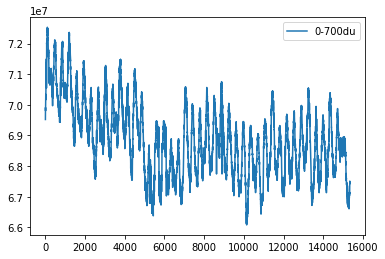

In [ ]:
df.plot()

Prophet expects the dataset to have two columns named as ds and y. ds is the date column while y is the column that we are forecasting

In [ ]:
df1 = df[[ 'date', '0-700du']]

In [ ]:
df1.head()

,date,0-700du
0,1/1/1979,69521214.94
1,1/2/1979,69713734.20
2,1/3/1979,69861784.74
3,1/4/1979,69861784.74
4,1/5/1979,69913049.80


In [ ]:
df1.columns

Index(['date', '0-700du'], dtype='object')

In [ ]:
df1.columns = ["ds", "y"]

In [ ]:
df1['ds']=pd.to_datetime(df1['ds'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df1.head()

,ds,y
0,1979-01-01,69521214.94
1,1979-01-02,69713734.20
2,1979-01-03,69861784.74
3,1979-01-04,69861784.74
4,1979-01-05,69913049.80


In [ ]:
df1.describe()

,y
count,1.534100e+04
mean,6.887724e+07
std,1.200835e+06
min,6.608207e+07
25%,6.791463e+07
50%,6.879528e+07
75%,6.966358e+07
max,7.253104e+07


In [ ]:
df1.columns

Index(['ds', 'y'], dtype='object')

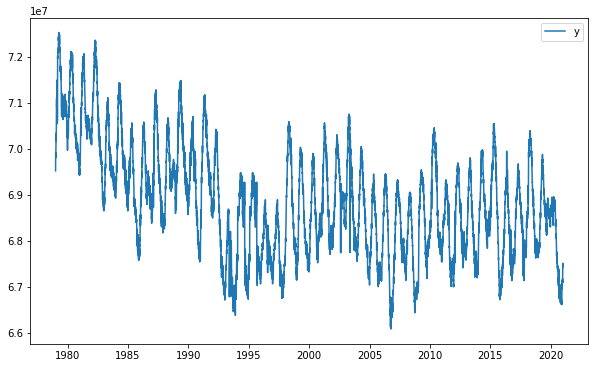

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df1.set_index('ds'))
plt.legend(['y'])

# 4. Model Fitting


We start by creating an instance of the Prophet class and then fit it to our dataset.

In [ ]:
from fbprophet import Prophet

In [ ]:
model = Prophet()

In [ ]:
model.fit(df1)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# 5. Making Future Predictions

The next step is to prepare our model to make future predictions.



This is achieved using the Prophet.make_future_dataframe method and passing the number of days we’d like to predict in the future. 

We use the periods attribute to specify this. This also include the historical dates. We’ll use these historical dates to compare the predictions with the actual values in the ds column.

In [ ]:
future_dates = model.make_future_dataframe(periods = 3650)

In [ ]:
df1.tail()

,ds,y
15336,2020-12-27,67360732.38
15337,2020-12-28,67343688.51
15338,2020-12-29,67394703.49
15339,2020-12-30,67511641.75
15340,2020-12-31,67429389.95


In [ ]:
future_dates

,ds
0,1979-01-01
1,1979-01-02
2,1979-01-03
3,1979-01-04
4,1979-01-05
...,...
18986,2030-12-25
18987,2030-12-26
18988,2030-12-27
18989,2030-12-28


# 6. Obtaining the Forecasts

We use the predict method to make future predictions. 

This will generate a dataframe with a **yhat** column that will contain the predictions.

In [ ]:
prediction = model.predict(future_dates)

If we check the head for our forecast dataframe we’ll notice that it has very many columns. 

However, we are mainly interested in **ds, yhat, yhat_lower** and **yhat_upper**. 

**yhat** is our predicted forecast, **yhat_lower** is the lower bound for our predictions and **yhat_upper** is the upper bound for our predictions.

In [ ]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1979-01-01,7.125098e+07,6.993227e+07,7.100356e+07,7.125098e+07,7.125098e+07,-790731.877254,-790731.877254,-790731.877254,508.823983,508.823983,508.823983,-791240.701236,-791240.701236,-791240.701236,0.0,0.0,0.0,7.046024e+07
1,1979-01-02,7.124999e+07,6.995407e+07,7.098446e+07,7.124999e+07,7.124999e+07,-779660.193136,-779660.193136,-779660.193136,-949.220409,-949.220409,-949.220409,-778710.972727,-778710.972727,-778710.972727,0.0,0.0,0.0,7.047033e+07
2,1979-01-03,7.124901e+07,6.997627e+07,7.097120e+07,7.124901e+07,7.124901e+07,-766849.247218,-766849.247218,-766849.247218,-1141.996052,-1141.996052,-1141.996052,-765707.251166,-765707.251166,-765707.251166,0.0,0.0,0.0,7.048216e+07
3,1979-01-04,7.124803e+07,6.994170e+07,7.099186e+07,7.124803e+07,7.124803e+07,-752245.898187,-752245.898187,-752245.898187,1.869137,1.869137,1.869137,-752247.767324,-752247.767324,-752247.767324,0.0,0.0,0.0,7.049578e+07
4,1979-01-05,7.124704e+07,6.998736e+07,7.101374e+07,7.124704e+07,7.124704e+07,-740022.664225,-740022.664225,-740022.664225,-1676.490179,-1676.490179,-1676.490179,-738346.174045,-738346.174045,-738346.174045,0.0,0.0,0.0,7.050702e+07


In [ ]:
prediction[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
18986,2030-12-25,6.724675e+07,4.977862e+07,8.555999e+07
18987,2030-12-26,6.725625e+07,4.973489e+07,8.595927e+07
18988,2030-12-27,6.726361e+07,4.966395e+07,8.590651e+07
18989,2030-12-28,6.727632e+07,4.974379e+07,8.586157e+07
18990,2030-12-29,6.728719e+07,4.961698e+07,8.589700e+07


In [ ]:
prediction[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1979-01-01,7.046024e+07,6.993227e+07,7.100356e+07
1,1979-01-02,7.047033e+07,6.995407e+07,7.098446e+07
2,1979-01-03,7.048216e+07,6.997627e+07,7.097120e+07
3,1979-01-04,7.049578e+07,6.994170e+07,7.099186e+07
4,1979-01-05,7.050702e+07,6.998736e+07,7.101374e+07


# 7. Plotting the Forecasts

Prophet has an inbuilt feature that enables us to plot the forecasts we just generated. 

This is achieved using model.plot() and passing in our forecasts as the argument. 

The blue line in the graph represents the predicted values while the black dots represents the data in our dataset.

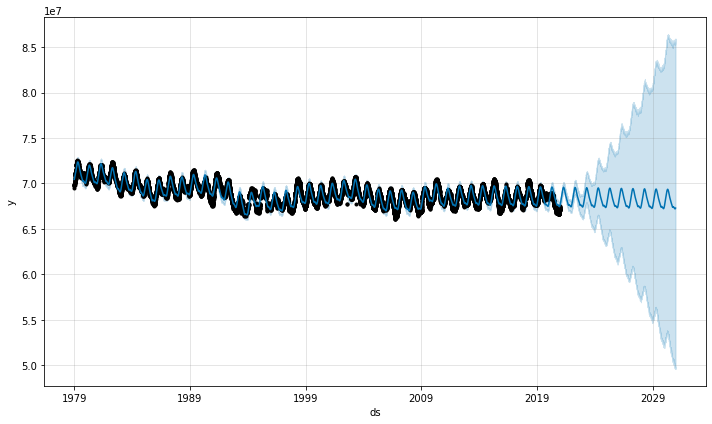

In [ ]:
plot1=model.plot(prediction)

# 8. Plotting the Forecast Components

The plot_components method plots the trend, yearly and weekly seasonality of the time series data.

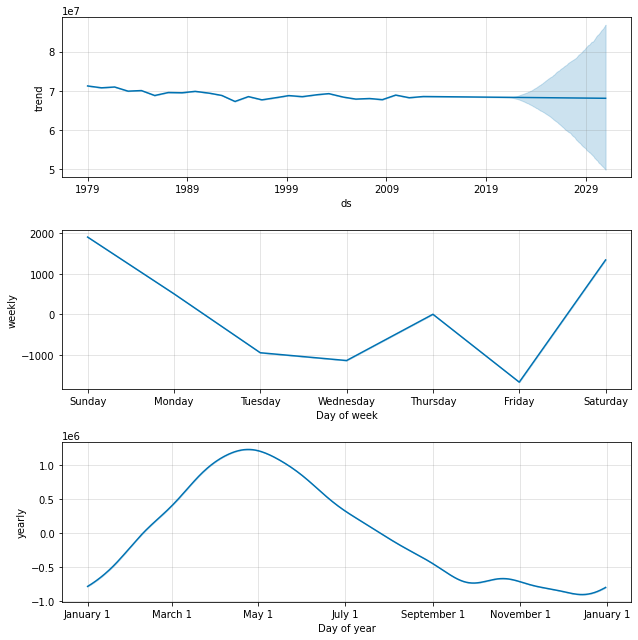

In [ ]:
plot2 = model.plot_components(prediction)

#9.  Cross Validation

Next We measure the forecast error using the historical data. We’ll do this by comparing the predicted values with the actual values. 

In order to perform this operation we select cut of points in the history of the data and fit the model with data upto that cut off point. Afterwards we compare the actual values to the predicted values. The cross_validation method allows us to do this in Prophet. 

This method take the following parameters as explained below:

1. horizon the forecast horizon
2. initial the size of the initial training period
3. period the spacing between cutoff dates


The output of the cross_validation method is a dataframe containing y the true values and yhat the predicted values. We’ll use this dataframe to compute the prediction errors.

In [ ]:
from fbprophet.diagnostics import cross_validation

In [ ]:
df_cv = cross_validation(model, horizon = '3650 days', period = '1825 days', initial = '10950 days')

In [ ]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2011-01-04,6.772484e+07,6.730582e+07,6.813197e+07,67837856.86,2011-01-03
1,2011-01-05,6.773650e+07,6.731659e+07,6.814790e+07,67822288.28,2011-01-03
2,2011-01-06,6.775227e+07,6.730330e+07,6.819243e+07,67847226.91,2011-01-03
3,2011-01-07,6.776556e+07,6.734336e+07,6.821087e+07,67839097.01,2011-01-03
4,2011-01-08,6.778366e+07,6.737622e+07,6.821681e+07,67791112.83,2011-01-03


In [ ]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
3645,2020-12-27,6.859658e+07,2.624316e+07,1.032203e+08,67360732.38,2011-01-03
3646,2020-12-28,6.860248e+07,2.633593e+07,1.029710e+08,67343688.51,2011-01-03
3647,2020-12-29,6.861168e+07,2.643270e+07,1.028769e+08,67394703.49,2011-01-03
3648,2020-12-30,6.862032e+07,2.652501e+07,1.029040e+08,67511641.75,2011-01-03
3649,2020-12-31,6.863308e+07,2.614035e+07,1.030133e+08,67429389.95,2011-01-03


# 10. Obtaining the Performance Metrics

We use the performance_metrics utility to compute the Mean Squared Error(MSE), Root Mean Squared Error(RMSE),Mean Absolute Error(MAE), Mean Absolute Percentage Error(MAPE) and the coverage of the the yhat_lower and yhat_upper estimates.

In [ ]:
from fbprophet.diagnostics import performance_metrics

In [ ]:
df_performance = performance_metrics(df_cv)

In [ ]:
df_performance

,horizon,mse,rmse,mae,mape,mdape,coverage
0,365 days,2.855308e+11,5.343508e+05,4.781289e+05,0.007027,0.006853,0.619178
1,366 days,2.860364e+11,5.348237e+05,4.790361e+05,0.007040,0.006853,0.619178
2,367 days,2.866528e+11,5.353997e+05,4.801218e+05,0.007056,0.006862,0.619178
3,368 days,2.872158e+11,5.359252e+05,4.811305e+05,0.007071,0.006874,0.619178
4,369 days,2.876235e+11,5.363054e+05,4.820049e+05,0.007084,0.006874,0.619178
...,...,...,...,...,...,...,...
3281,3646 days,2.947412e+12,1.716803e+06,1.610134e+06,0.023794,0.027464,1.000000
3282,3647 days,2.951711e+12,1.718054e+06,1.613242e+06,0.023840,0.027464,1.000000
3283,3648 days,2.955675e+12,1.719208e+06,1.616071e+06,0.023883,0.027464,1.000000
3284,3649 days,2.959009e+12,1.720177e+06,1.618805e+06,0.023923,0.027464,1.000000


#11.  Visualizing Performance Metrics

The performance Metrics can be visualized using the plot_cross_validation_metric utility. 

Here we visualize the RMSE below.

In [ ]:
from fbprophet.plot import plot_cross_validation_metric

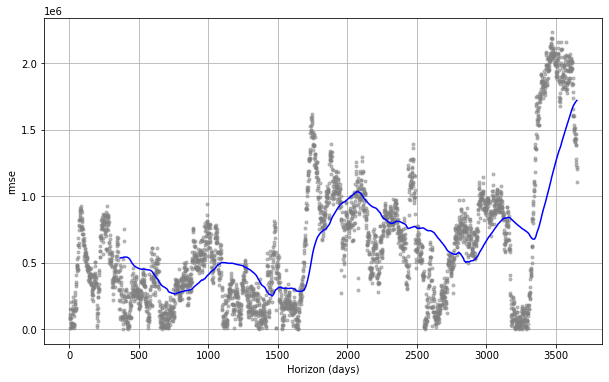

In [ ]:
fig = plot_cross_validation_metric(df_cv, metric='rmse')